In [ ]:
import pickle
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
#!pip install scikit-learn
#!pip install openpyxl

In [ ]:
newdf = pd.read_excel("C:/Users/CarlosDaniel/3D Objects/Ciencia de datos/Volve production data.xlsx")

In [ ]:
newdf['NPD_WELL_BORE_CODE'].value_counts()

NPD_WELL_BORE_CODE
5693    3327
5769    3306
5599    3056
5351    3056
7078    1165
7289     978
7405     746
Name: count, dtype: int64

In [ ]:
#Los datos están muy sesgados y dependen del pozo, por lo tanto, he usado relleno para completar los valores que faltan
newdf['ON_STREAM_HRS'] = newdf['ON_STREAM_HRS'].ffill()
newdf['AVG_DOWNHOLE_PRESSURE'] = newdf['AVG_DOWNHOLE_PRESSURE'].ffill()
newdf['AVG_DOWNHOLE_TEMPERATURE'] = newdf['AVG_DOWNHOLE_TEMPERATURE'].ffill()
newdf['AVG_DP_TUBING'] = newdf['AVG_DP_TUBING'].ffill()
newdf['AVG_ANNULUS_PRESS'] = newdf['AVG_ANNULUS_PRESS'].ffill()
newdf['AVG_CHOKE_SIZE_P'] = newdf['AVG_CHOKE_SIZE_P'].ffill()
newdf['AVG_WHP_P'] = newdf['AVG_WHP_P'].ffill()
newdf['AVG_WHT_P'] = newdf['AVG_WHT_P'].ffill()
newdf['DP_CHOKE_SIZE'] = newdf['DP_CHOKE_SIZE'].ffill()
newdf['BORE_OIL_VOL'] = newdf['BORE_OIL_VOL'].ffill()
newdf['BORE_GAS_VOL'] = newdf['BORE_GAS_VOL'].ffill()
newdf['BORE_WAT_VOL'] = newdf['BORE_WAT_VOL'].ffill()

In [ ]:
#Se lleva a cabo la reducción de dimensionalidad en el marco de datos original
# Eliminación de funciones innecesarias: WELL_BORE_CODE, NPD_WELL_BORE_NAME, NPD_FIELD_NAME, NPD_FIELD_CODE, NPD_FACILITY_CODE, NPD_FACILITY_NAME

to_drop = ["WELL_BORE_CODE", "NPD_WELL_BORE_NAME", "NPD_FIELD_NAME", "NPD_FIELD_CODE", "NPD_FACILITY_CODE", "NPD_FACILITY_NAME","AVG_DOWNHOLE_PRESSURE", "AVG_DP_TUBING","BORE_WI_VOL","AVG_CHOKE_UOM","FLOW_KIND","WELL_TYPE","BORE_GAS_VOL"]
newdfmodel = newdf.drop(to_drop, axis=1)
print(newdfmodel.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15634 entries, 0 to 15633
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   DATEPRD                   15634 non-null  datetime64[ns]
 1   NPD_WELL_BORE_CODE        15634 non-null  int64         
 2   ON_STREAM_HRS             15634 non-null  float64       
 3   AVG_DOWNHOLE_TEMPERATURE  15634 non-null  float64       
 4   AVG_ANNULUS_PRESS         15634 non-null  float64       
 5   AVG_CHOKE_SIZE_P          15634 non-null  float64       
 6   AVG_WHP_P                 15634 non-null  float64       
 7   AVG_WHT_P                 15634 non-null  float64       
 8   DP_CHOKE_SIZE             15634 non-null  float64       
 9   BORE_OIL_VOL              15634 non-null  float64       
 10  BORE_WAT_VOL              15634 non-null  float64       
dtypes: datetime64[ns](1), float64(9), int64(1)
memory usage: 1.3 MB
None


In [ ]:
#Scaling dataset to remove difference in distributions within columns

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))
newdfmodel[['ON_STREAM_HRS','AVG_DOWNHOLE_TEMPERATURE','AVG_ANNULUS_PRESS','AVG_CHOKE_SIZE_P','AVG_WHP_P','AVG_WHT_P','DP_CHOKE_SIZE','BORE_OIL_VOL','BORE_WAT_VOL']] = scaler.fit_transform(newdfmodel[['ON_STREAM_HRS','AVG_DOWNHOLE_TEMPERATURE','AVG_ANNULUS_PRESS', 'AVG_CHOKE_SIZE_P','AVG_WHP_P', 'AVG_WHT_P','DP_CHOKE_SIZE','BORE_OIL_VOL','BORE_WAT_VOL']])


#Taking the data of wells 2 to 4 since they were the ones with the east number of missing values
fdf = newdfmodel.loc[746: 15635]

X = fdf.drop(['BORE_OIL_VOL'],axis=1)
y= fdf[['BORE_OIL_VOL','NPD_WELL_BORE_CODE']]

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.3, random_state=42)

In [ ]:
x_train_final = X_train.drop(['DATEPRD','NPD_WELL_BORE_CODE'],axis = 1)
x_test_final = X_test.drop(['DATEPRD','NPD_WELL_BORE_CODE'],axis = 1)

In [ ]:
x_train_final.shape

(10421, 8)

In [ ]:
y_test_final = y_test['BORE_OIL_VOL']
y_train_final = y_train['BORE_OIL_VOL']

In [ ]:
X = fdf.drop(['DATEPRD','BORE_OIL_VOL'],axis=1).values
y= fdf['BORE_OIL_VOL']

# Remodelacion

In [ ]:
x_train_final = x_train_final.to_numpy()
x_train_final= x_train_final.reshape(x_train_final.shape[0], x_train_final.shape[1], 1)

In [ ]:
y_train_final =np.array(y_train_final).reshape(y_train_final.shape[0],1)

# Parte 2 - Construyendo el RNN

In [ ]:
# Importar Keras y librerías adicionales
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
import tensorflow as ts
from sklearn.metrics import r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense



# Inicializar la RNA

In [ ]:
regressor = Sequential()

# Añadiendo la primera capa de LSTM y algo de regularización de la deserción

In [ ]:
regressor.add(LSTM(units = 50,activation='tanh',return_sequences = True, input_shape =(x_train_final.shape[1], 1 )))



# Añadiendo la segunda capa de LSTM y algo de regularización de la deserción

In [ ]:
regressor.add(LSTM(units =50,activation='relu',return_sequences = True))


# Añadiendo la tercera capa de LSTM y algo de regularización de la deserción

In [ ]:
regressor.add(LSTM(units = 50,activation='sigmoid', return_sequences = True))


# Añadiendo la cuarta capa de LSTM y algo de regularización de la deserción

In [ ]:
regressor.add(LSTM(units = 50,activation='relu'))


# Añadiendo la capa de salida

In [ ]:
regressor.add(Dense(units = 1))

# Compilación del RNN

In [ ]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error',metrics = ['mse', 'mae'])

# Ajustar el RNN al set de entrenamiento

In [ ]:
regressor.fit(x_train_final, y_train_final, epochs = 10, batch_size = 10)

Epoch 1/10
1043/1043 [==============================] - 24s 17ms/step - loss: 0.0265 - mse: 0.0265 - mae: 0.0971
Epoch 2/10
1043/1043 [==============================] - 17s 16ms/step - loss: 0.0117 - mse: 0.0117 - mae: 0.0582
Epoch 3/10
1043/1043 [==============================] - 18s 17ms/step - loss: 0.0058 - mse: 0.0058 - mae: 0.0398
Epoch 4/10
1043/1043 [==============================] - 18s 17ms/step - loss: 0.0038 - mse: 0.0038 - mae: 0.0320
Epoch 5/10
1043/1043 [==============================] - 17s 16ms/step - loss: 0.0029 - mse: 0.0029 - mae: 0.0282
Epoch 6/10
1043/1043 [==============================] - 17s 16ms/step - loss: 0.0024 - mse: 0.0024 - mae: 0.0258
Epoch 7/10
1043/1043 [==============================] - 16s 16ms/step - loss: 0.0022 - mse: 0.0022 - mae: 0.0240
Epoch 8/10
1043/1043 [==============================] - 16s 16ms/step - loss: 0.0022 - mse: 0.0022 - mae: 0.0248
Epoch 9/10
1043/1043 [==============================] - 17s 16ms/step - loss: 0.0019 - mse: 0.00

# Parte 3 - Hacer las predicciones y visualizar los resultados

30/30 [==============================] - 1s 5ms/step


Text(0.5, 1.0, 'Actual v/s Neural Network  prediction for Bore Oil Volume for Well No. - 5599')

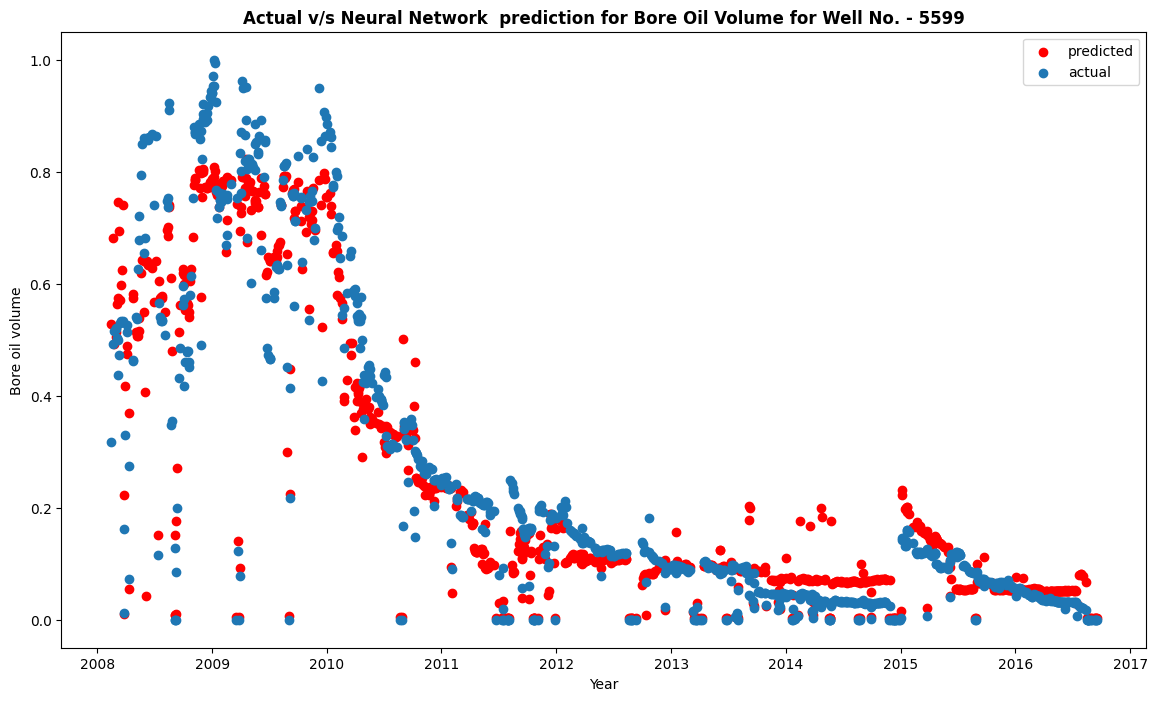

In [ ]:
X_test_5599 = X_test[X_test["NPD_WELL_BORE_CODE"] == 5599]

y_test_5599 = y_test[y_test["NPD_WELL_BORE_CODE"] == 5599]

x_test_5599final = X_test_5599.drop(['DATEPRD',"NPD_WELL_BORE_CODE"],axis = 1)


y_predi = regressor.predict(x_test_5599final)

import matplotlib.pyplot as plt
plt.style.use('default' )
plt.figure(figsize = (14,8))
plt.scatter(X_test_5599["DATEPRD"].tolist(),y_predi,label='predicted',color='red')
plt.scatter(X_test_5599["DATEPRD"].tolist(),y_test_5599['BORE_OIL_VOL'],label='actual')
plt.legend()
plt.xlabel("Year")
plt.ylabel("Bore oil volume")
plt.title('Actual v/s Neural Network  prediction for Bore Oil Volume for Well No. - 5599',fontweight='bold')




28/28 [==============================] - 0s 6ms/step


Text(0.5, 1.0, 'Actual v/s Neural Network Model prediction for Bore Oil Volume for Well No. - 5351')

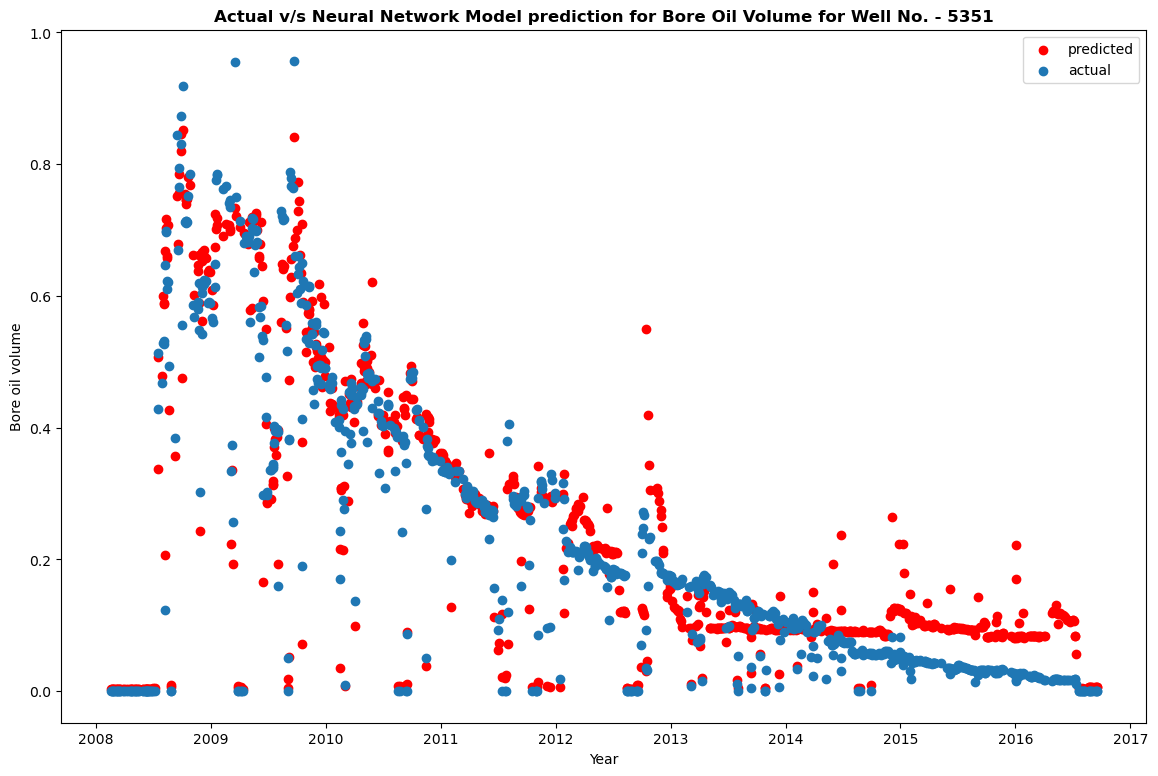

In [ ]:
X_test_5351 = X_test[X_test["NPD_WELL_BORE_CODE"] == 5351]

y_test_5351 = y_test[y_test["NPD_WELL_BORE_CODE"] == 5351]

x_test_5351final = X_test_5351.drop(['DATEPRD',"NPD_WELL_BORE_CODE"],axis = 1)

y_predicho = regressor.predict(x_test_5351final)
plt.style.use('default')
plt.figure(figsize = (14,9))
plt.scatter(X_test_5351["DATEPRD"].tolist(),y_predicho,label='predicted',color='red')
plt.scatter(X_test_5351["DATEPRD"].tolist(),y_test_5351['BORE_OIL_VOL'],label='actual')
plt.legend()
plt.xlabel("Year")
plt.ylabel("Bore oil volume")
plt.title('Actual v/s Neural Network Model prediction for Bore Oil Volume for Well No. - 5351',fontweight='bold')

11/11 [==============================] - 0s 6ms/step


Text(0.5, 1.0, 'Actual v/s Neural Network Model prediction for Bore Oil Volume for Well No. - 7078')

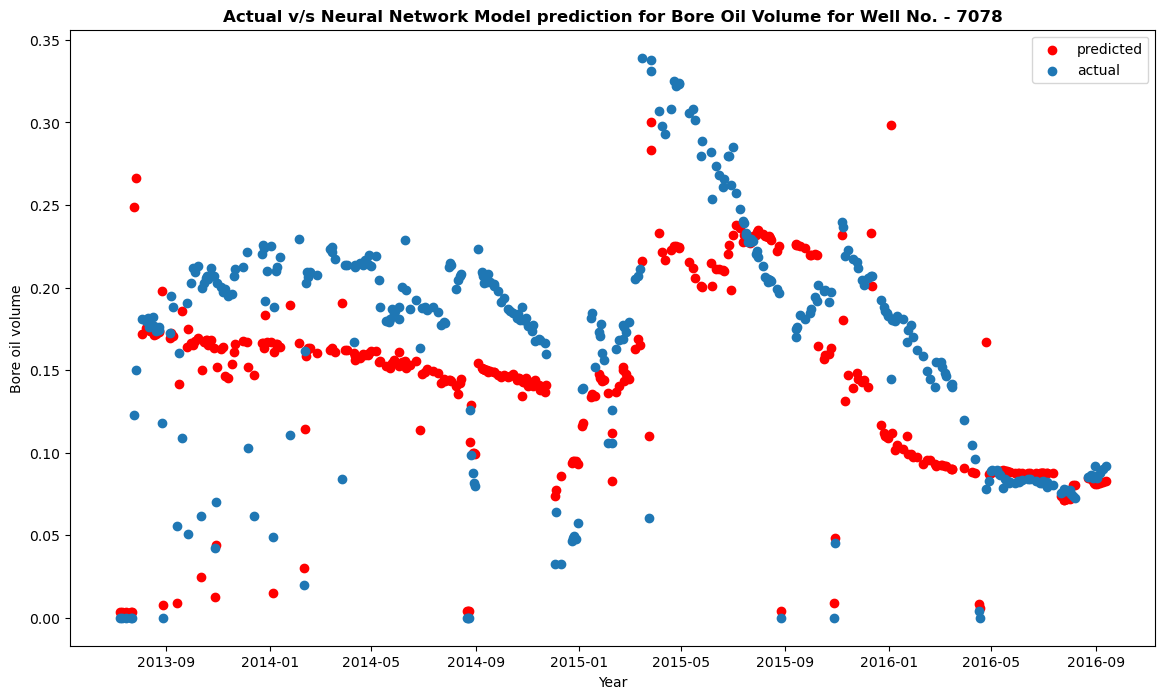

In [ ]:
X_test_7078 = X_test[X_test["NPD_WELL_BORE_CODE"] == 7078]

y_test_7078 = y_test[y_test["NPD_WELL_BORE_CODE"] == 7078]

x_test_7078final = X_test_7078.drop(['DATEPRD',"NPD_WELL_BORE_CODE"],axis = 1)


y_predich = regressor.predict(x_test_7078final)
plt.style.use('default')
plt.figure(figsize = (14,8))
plt.scatter(X_test_7078["DATEPRD"].tolist(),y_predich,label='predicted',color='red')
plt.scatter(X_test_7078["DATEPRD"].tolist(),y_test_7078['BORE_OIL_VOL'],label='actual')
plt.legend()
plt.xlabel("Year")
plt.ylabel("Bore oil volume")
plt.title('Actual v/s Neural Network Model prediction for Bore Oil Volume for Well No. - 7078',fontweight='black')


10/10 [==============================] - 0s 8ms/step


Text(0.5, 1.0, 'Actual v/s Neural Network Model prediction for Bore Oil Volume for Well No. - 7289')

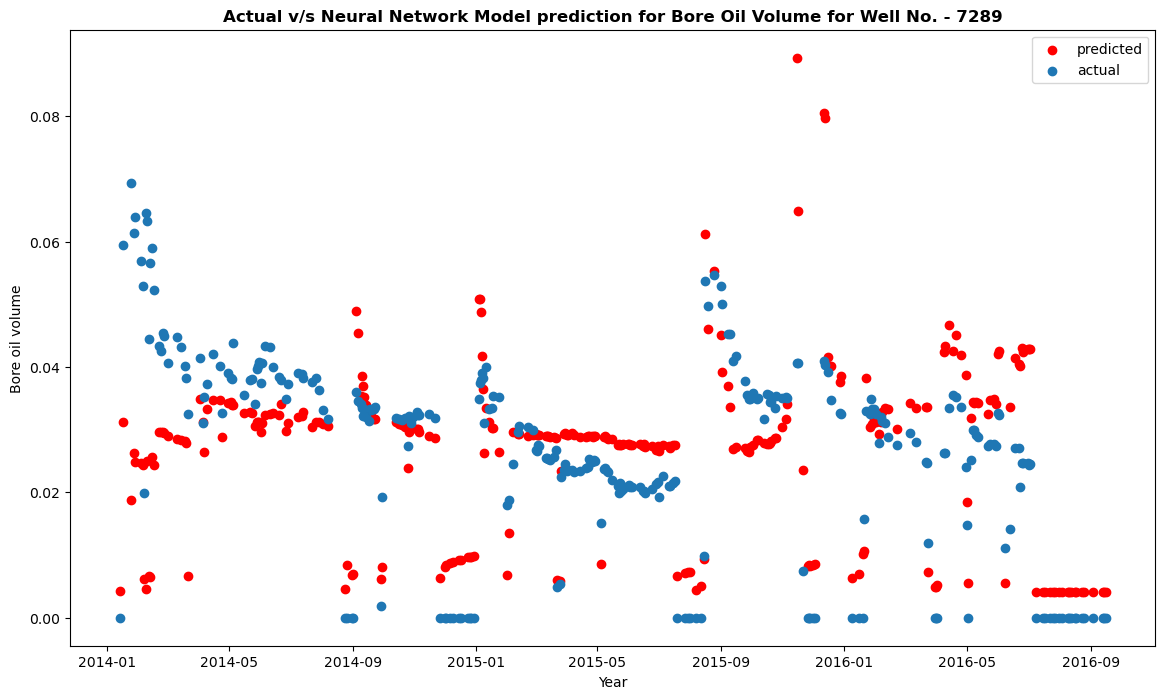

In [ ]:
X_test_7289 = X_test[X_test["NPD_WELL_BORE_CODE"] == 7289]

y_test_7289 = y_test[y_test["NPD_WELL_BORE_CODE"] == 7289]

x_test_7289final = X_test_7289.drop(['DATEPRD',"NPD_WELL_BORE_CODE"],axis = 1)


y_predich = regressor.predict(x_test_7289final)
plt.style.use('default')
plt.figure(figsize = (14,8))
plt.scatter(X_test_7289["DATEPRD"].tolist(),y_predich,label='predicted',color='red')
plt.scatter(X_test_7289["DATEPRD"].tolist(),y_test_7289['BORE_OIL_VOL'],label='actual')
plt.legend()
plt.xlabel("Year")
plt.ylabel("Bore oil volume")
plt.title('Actual v/s Neural Network Model prediction for Bore Oil Volume for Well No. - 7289',fontweight='bold')


In [ ]:
#salvando_archivo
with open('regressor.pkl', 'wb') as file:
    pickle.dump(regressor, file)

INFO:tensorflow:Assets written to: ram://19a64876-285c-444b-b484-4ae040b094c7/assets


INFO:tensorflow:Assets written to: ram://19a64876-285c-444b-b484-4ae040b094c7/assets


In [ ]:
with open('regressor.pkl', 'rb') as file:
    modelo_importado = pickle.load(file)

FileNotFoundError: Unsuccessful TensorSliceReader constructor: Failed to find any matching files for ram://2847dc00-55fa-409d-8a7d-8f7878ee9340/variables/variables
 You may be trying to load on a different device from the computational device. Consider setting the `experimental_io_device` option in `tf.saved_model.LoadOptions` to the io_device such as '/job:localhost'.

In [ ]:
regressor.save("regresor.h5")

In [ ]:
modelo_importado=ts.keras.saving.load_model("regressor.h5")

AttributeError: module 'tensorflow.keras' has no attribute 'saving'

In [ ]:
#Guardar modelo
from keras.models import load_model

In [ ]:
modelo_importado=load_model("regresor.h5")

10/10 [==============================] - 2s 15ms/step


Text(0.5, 1.0, 'Actual v/s Neural Network Model prediction for Bore Oil Volume for Well No. - 7289')

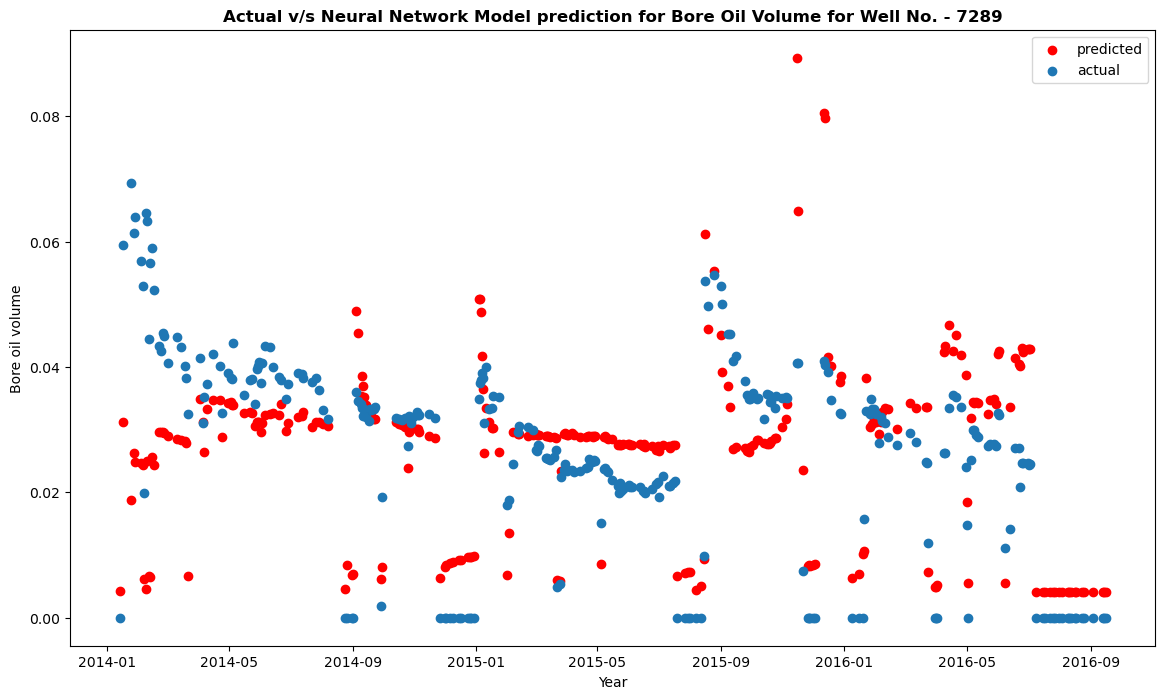

In [ ]:
X_test_7289 = X_test[X_test["NPD_WELL_BORE_CODE"] == 7289]

y_test_7289 = y_test[y_test["NPD_WELL_BORE_CODE"] == 7289]

x_test_7289final = X_test_7289.drop(['DATEPRD',"NPD_WELL_BORE_CODE"],axis = 1)


y_predich = modelo_importado.predict(x_test_7289final)
plt.style.use('default')
plt.figure(figsize = (14,8))
plt.scatter(X_test_7289["DATEPRD"].tolist(),y_predich,label='predicted',color='red')
plt.scatter(X_test_7289["DATEPRD"].tolist(),y_test_7289['BORE_OIL_VOL'],label='actual')
plt.legend()
plt.xlabel("Year")
plt.ylabel("Bore oil volume")
plt.title('Actual v/s Neural Network Model prediction for Bore Oil Volume for Well No. - 7289',fontweight='bold')